Objetivo: prever o valor que será concedido a certa pessoa em um empréstimo

In [46]:
import pandas as pd
teste = pd.read_csv('test_emprestimo.csv')
treino = pd.read_csv('train_emprestimo.csv')

# === limpar os dados ===

# tirar dados inúteis
teste.drop('Loan_ID', axis=1, inplace=True)
treino.drop('Loan_ID', axis=1, inplace=True)

# tirar dados nulos
teste.dropna(inplace=True)
treino.dropna(inplace=True)
# OBS: apesar de serem removidos muitas amostras com o 'dropna', nesse caso, resolvi fazer isso, porque não poderia pegar a média ou algo do tipo, porque uma linha 
# não tem relação com outra

# arrumar tipagem colunas
# Coluna de gênero:
teste = teste.replace('Male', 1).replace('Female', -1)
treino = treino.replace('Male', 1).replace('Female', -1)
# Married:
teste = teste.replace('Yes', 1).replace('No', -1)
treino = treino.replace('Yes', 1).replace('No', -1)
# Education:
teste = teste.replace('Graduate', 1).replace('Not Graduate', -1)
treino = treino.replace('Graduate', 1).replace('Not Graduate', -1)
# Property_Area:
teste = teste.replace('Urban', 1).replace('Rural', -1).replace('Semiurban', 0)
treino = treino.replace('Urban', 1).replace('Rural', -1).replace('Semiurban', 0)
# Dependents:
teste['Dependents'] = pd.to_numeric(teste['Dependents'].replace('3+', '3'))
treino['Dependents'] = pd.to_numeric(treino['Dependents'].replace('3+', '3'))
# Loan_Status:
treino = treino.replace('N', -1).replace('Y', 1)

teste_final = teste

[]

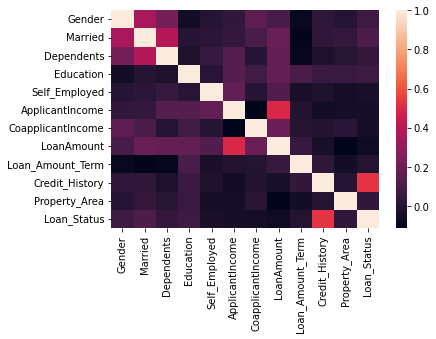

In [47]:
# Análise exploratória
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(treino.corr())
plt.plot() # Credit_History é o com a maior relevância, provavelmente porque os bancos se sentem mais confortáveis com quem geralmente tem pagado suas contas, então o dará menor problema

In [48]:
# Modelo preditivo:
from sklearn.ensemble import RandomForestClassifier  # não usarei nenhum modelo de regressão porque queremos classificar
from sklearn.linear_model import LogisticRegression

modelo_arvores = RandomForestClassifier()
modelo_regressao = LogisticRegression()

treino_y = treino[:400]['Loan_Status']
treino_x = treino[:400].drop('Loan_Status', axis=1)
teste_y = treino[400:]['Loan_Status']
teste_x = treino[400:].drop('Loan_Status', axis=1)

modelo_arvores.fit(treino_x, treino_y)
modelo_regressao.fit(treino_x, treino_y)

print('Acurácia árvores:', modelo_arvores.score(teste_x, teste_y))  # levemente melhor
print('Acurácia regressão:', modelo_regressao.score(teste_x, teste_y))

Acurácia árvores: 0.8
Acurácia regressão: 0.7625


/home/gustavo/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# Novas previsões:
display(modelo_arvores.predict(teste_final))

array([ 1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1